In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('cleaned_data_no_outliers.csv')

In [4]:
df

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Total Time (hrs/day),Calls Duration (hrs/day),Apps Installed Category
0,53,Male,Mumbai,Vivo,Android,3.7,23.9,104,3.9,469,5.2,4.1,803,Education,17.531667,0.631667,Low
1,60,Other,Delhi,Realme,iOS,9.2,28.1,169,2.8,4997,5.1,0.4,1526,Gaming,17.728333,0.228333,High
2,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,96,3.0,2381,1.7,2.9,1619,Entertainment,13.213333,1.113333,Low
3,32,Male,Pune,Samsung,Android,11.0,25.6,146,5.2,1185,3.2,0.3,1560,Entertainment,22.303333,2.603333,Medium
4,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,86,5.5,106,3.4,2.3,742,Social Media,17.336667,3.936667,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17673,27,Other,Mumbai,Apple,iOS,7.2,36.6,81,5.1,4007,3.8,3.3,1380,Entertainment,20.906667,1.506667,Low
17674,40,Female,Chennai,Oppo,iOS,9.5,12.9,166,4.3,8550,3.4,0.7,222,Education,21.950000,4.050000,High
17675,34,Female,Ahmedabad,Realme,Android,1.1,48.9,70,5.3,5516,0.7,4.0,1612,Entertainment,12.345000,1.245000,Low
17676,22,Male,Hyderabad,Vivo,Android,8.8,25.6,96,2.4,3614,6.6,0.8,1528,Work,20.360000,1.760000,Low


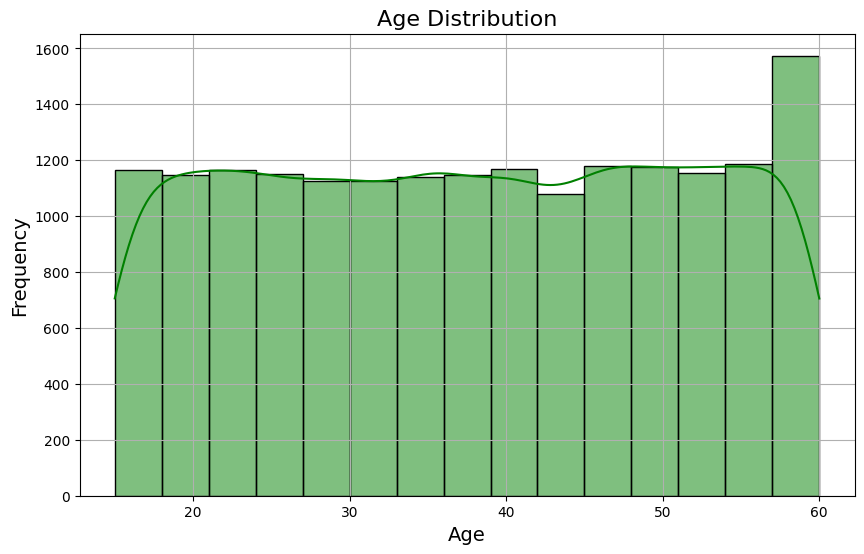

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=15, color='green')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

C:\Users\jaink\AppData\Local\Temp\ipykernel_7516\2535893345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


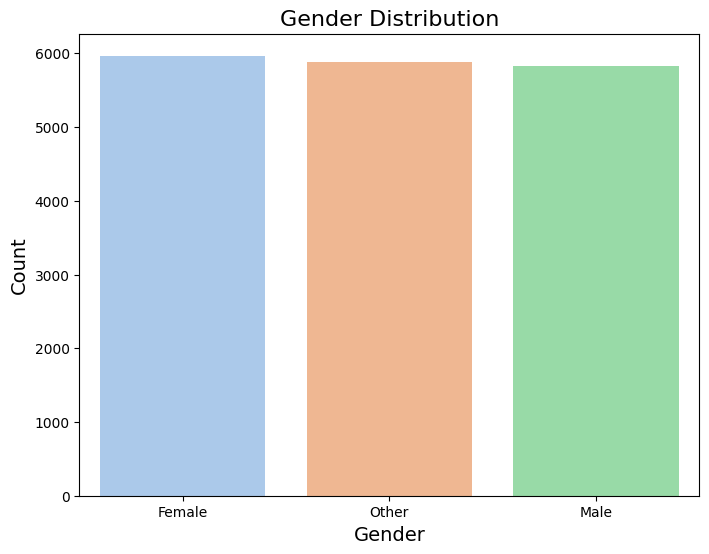

In [8]:
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

C:\Users\jaink\AppData\Local\Temp\ipykernel_7516\1214638718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Primary Use', order=df['Primary Use'].value_counts().index, palette='coolwarm')


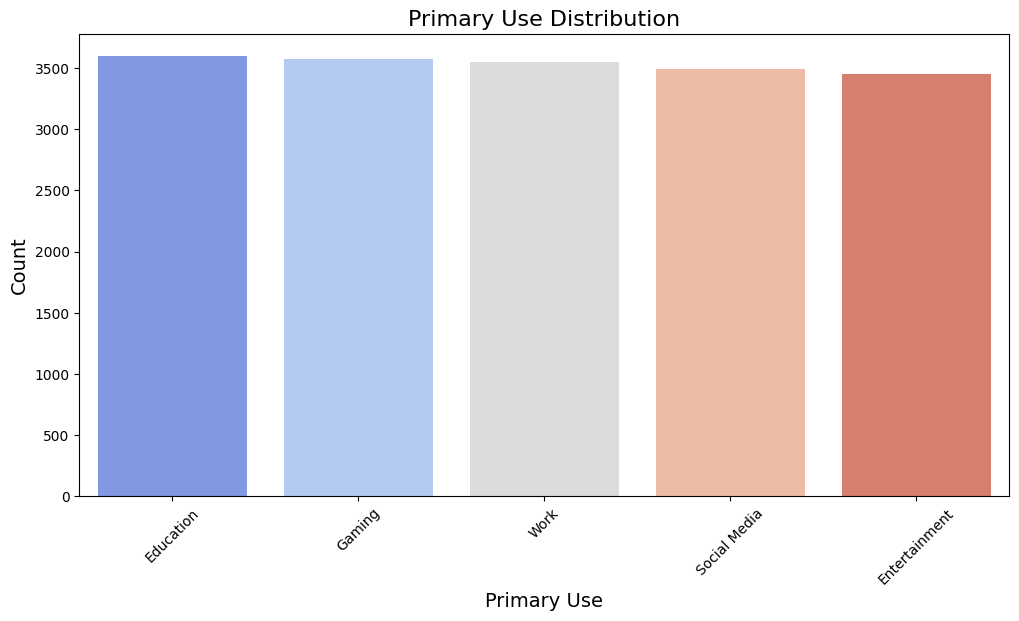

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Primary Use', order=df['Primary Use'].value_counts().index, palette='coolwarm')
plt.title('Primary Use Distribution', fontsize=16)
plt.xlabel('Primary Use', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

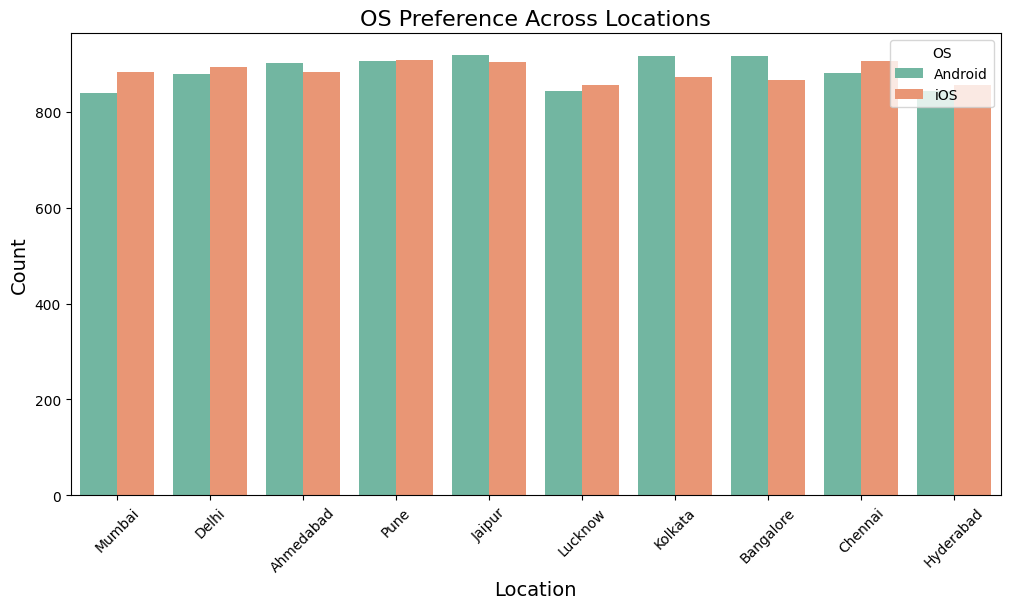

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location', hue='OS', palette='Set2')
plt.title('OS Preference Across Locations', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='OS')
plt.show()

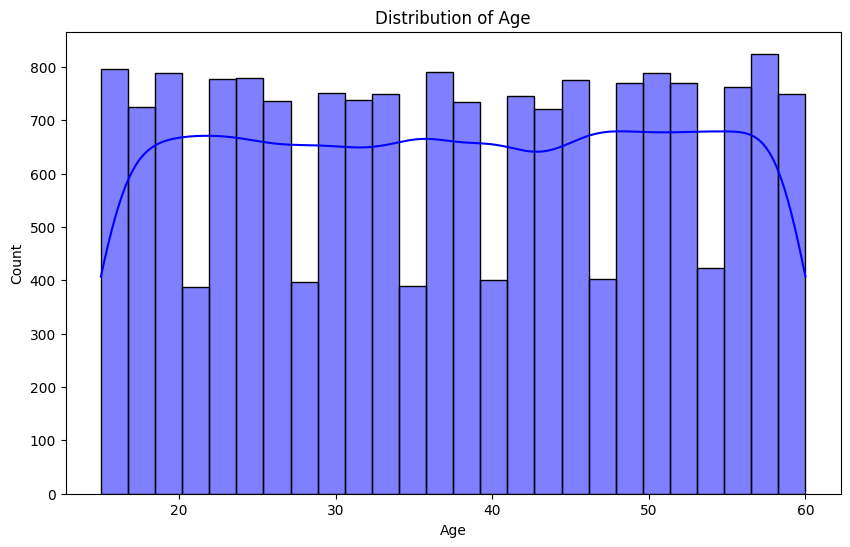

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Majority of users are in the age range of 30-50

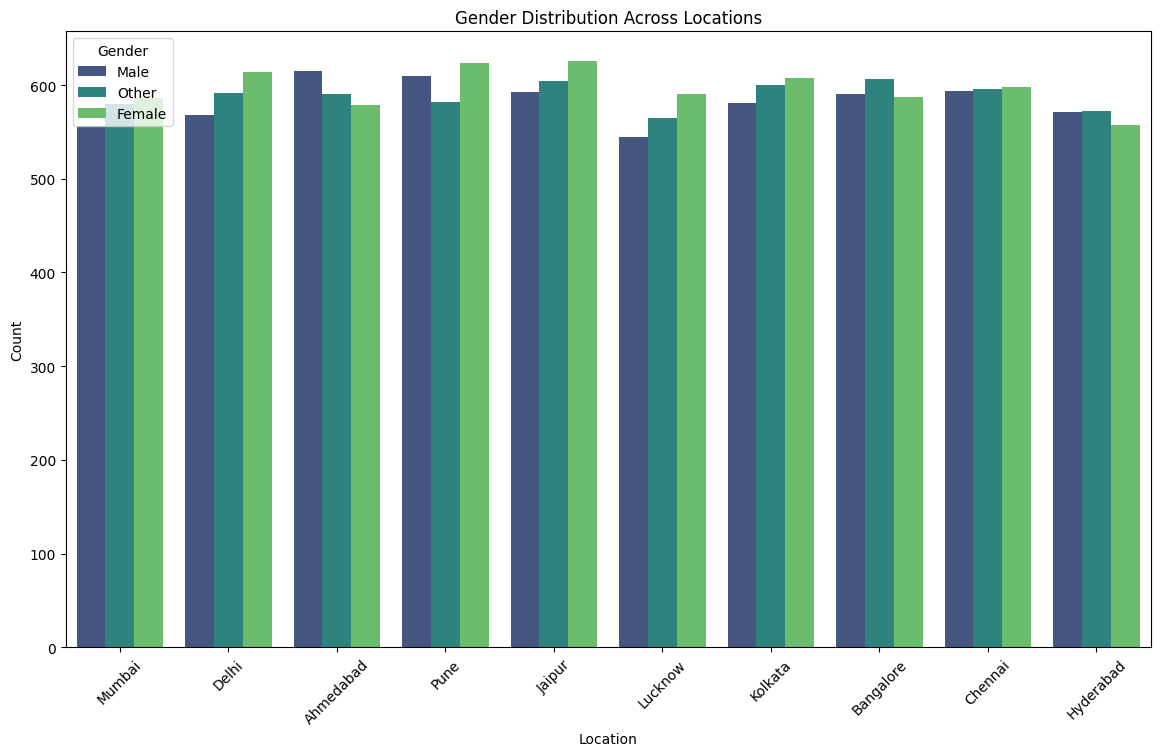

In [28]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Location', hue='Gender', palette='viridis', dodge=True)
plt.title('Gender Distribution Across Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

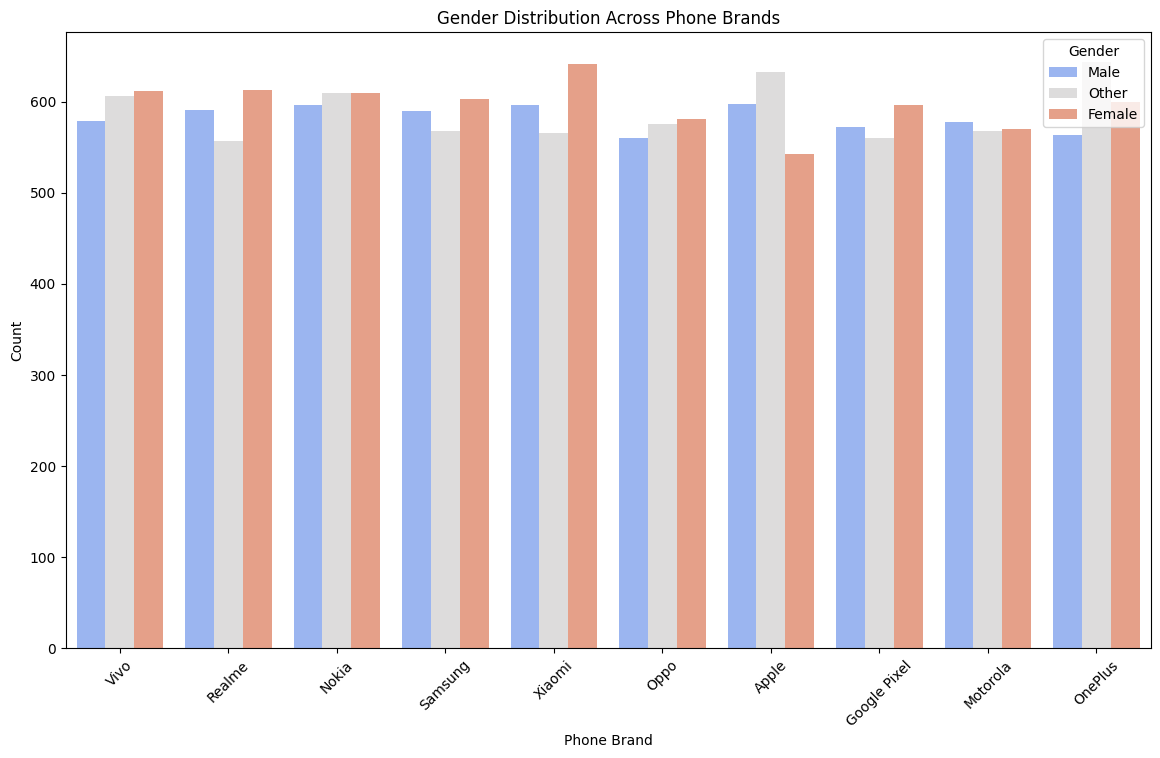

In [29]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Phone Brand', hue='Gender', palette='coolwarm', dodge=True)
plt.title('Gender Distribution Across Phone Brands')
plt.xlabel('Phone Brand')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

# Xiaomi is most popular brand among females.
# Apple is most popular brand among males.

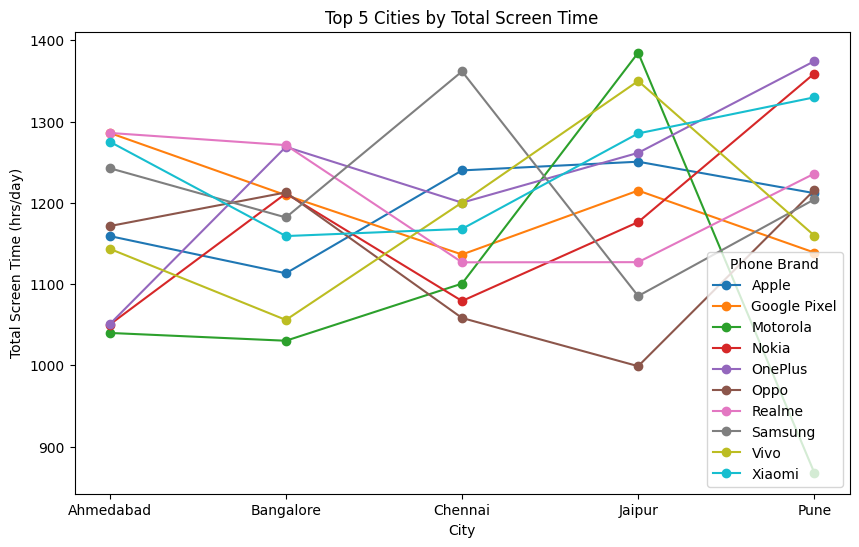

In [47]:
city_brand_screen_time = df.groupby(['Location', 'Phone Brand'])['Screen Time (hrs/day)'].sum().reset_index()

# Get the top 5 cities by total screen time
top_cities = city_brand_screen_time.groupby('Location')['Screen Time (hrs/day)'].sum().sort_values(ascending=False).head(5).index
top_city_data = city_brand_screen_time[city_brand_screen_time['Location'].isin(top_cities)]

# Plotting
plt.figure(figsize=(10, 6))
for brand in top_city_data['Phone Brand'].unique():
    subset = top_city_data[top_city_data['Phone Brand'] == brand]
    plt.plot(subset['Location'], subset['Screen Time (hrs/day)'], label=brand, marker='o')

plt.title('Top 5 Cities by Total Screen Time')
plt.xlabel('City')
plt.ylabel('Total Screen Time (hrs/day)')
plt.legend(title='Phone Brand')
plt.grid(False)
plt.show()

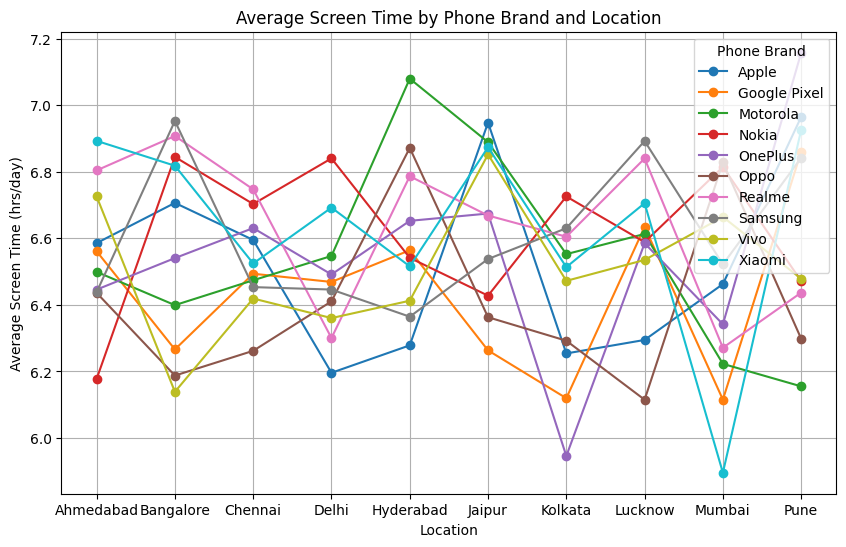

In [44]:
avg_screen_time = df.groupby(['Phone Brand', 'Location'])['Screen Time (hrs/day)'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
for brand in avg_screen_time['Phone Brand'].unique():
    subset = avg_screen_time[avg_screen_time['Phone Brand'] == brand]
    plt.plot(subset['Location'], subset['Screen Time (hrs/day)'], label=brand, marker='o')

plt.title('Average Screen Time by Phone Brand and Location')
plt.xlabel('Location')
plt.ylabel('Average Screen Time (hrs/day)')
plt.legend(title='Phone Brand')
plt.grid(True)
plt.show()

### Hyderabad has the highest MOtorola users
### Kolkata has the lowest OnePlus users
### Average Screen time acroos all cities is ~6.5hrs/day

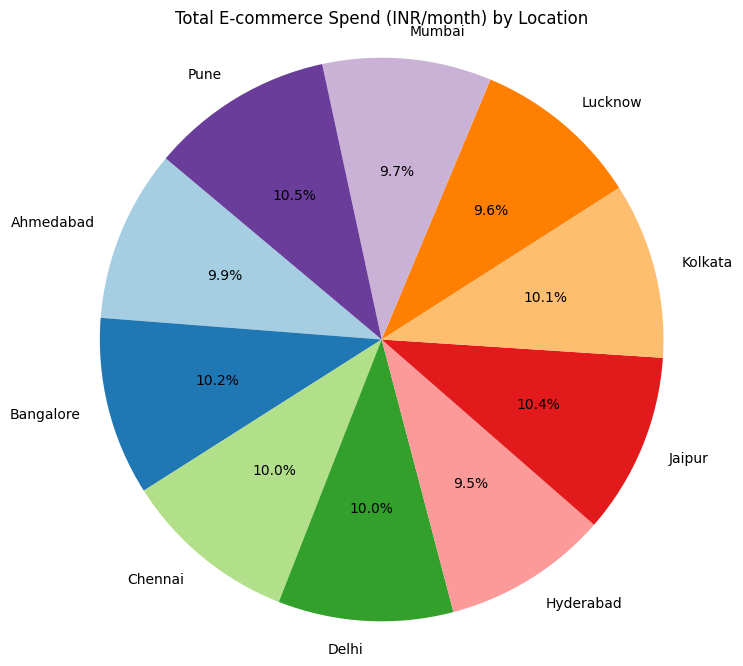

In [48]:
location_spend = df.groupby('Location')['E-commerce Spend (INR/month)'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_spend, labels=location_spend.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total E-commerce Spend (INR/month) by Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Pune has the highest E-commerce spend

C:\Users\jaink\AppData\Local\Temp\ipykernel_7516\1759470351.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_use = df.groupby(['Age Group', 'Primary Use']).size().unstack(fill_value=0)


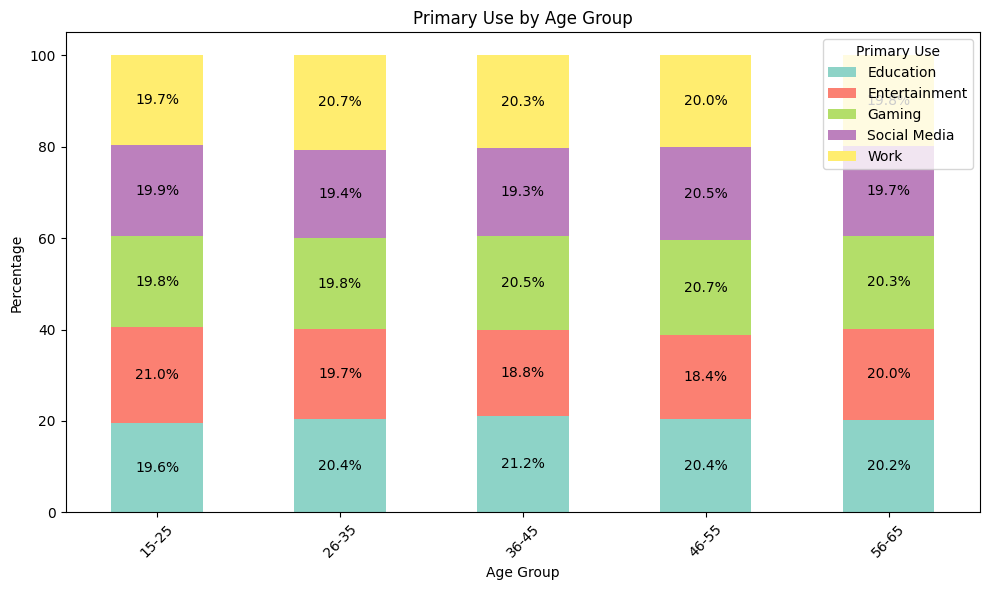

In [56]:
age_bins = [15, 25, 35, 45, 55, 65]
age_labels = ['15-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count occurrences of each Primary Use in each Age Group
age_group_use = df.groupby(['Age Group', 'Primary Use']).size().unstack(fill_value=0)

# Calculate percentage
age_group_use_percentage = age_group_use.divide(age_group_use.sum(axis=1), axis=0) * 100

# Plotting
ax = age_group_use_percentage.plot(kind='bar', stacked=True, colormap='Set3', figsize=(10, 6))

# Adding percentage labels on top of each block
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid division by zero
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', fontsize=10, color='black')

# Title and labels
plt.title('Primary Use by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Age group 15 - 25 use phone for Entertainment most 
### Age group 26 - 35 use phone for Work most 
### Age group 36 - 45 use phone for Education most 
### Age group 46 - 55 use phone for Gaming most 
### Age group 56 - 65 use phone for Gaming most 

C:\Users\jaink\AppData\Local\Temp\ipykernel_15800\3473527073.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Gender", y="Monthly Recharge Cost (INR)", hue="OS", ci=None)


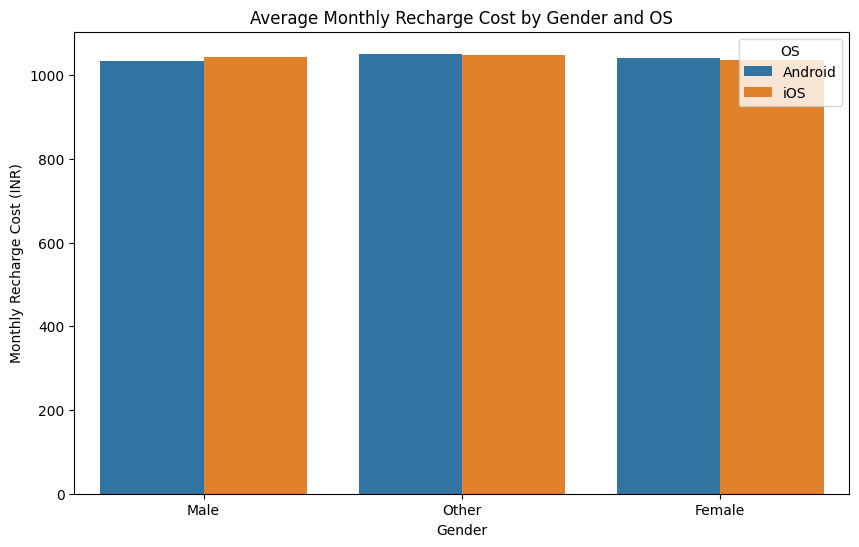

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Gender", y="Monthly Recharge Cost (INR)", hue="OS", ci=None)
plt.title("Average Monthly Recharge Cost by Gender and OS")
plt.xlabel("Gender")
plt.ylabel("Monthly Recharge Cost (INR)")
plt.legend(title="OS")
plt.show()

C:\Users\jaink\AppData\Local\Temp\ipykernel_15800\2376185794.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Phone Brand", y="Calls Duration (hrs/day)", hue="OS", ci=None)


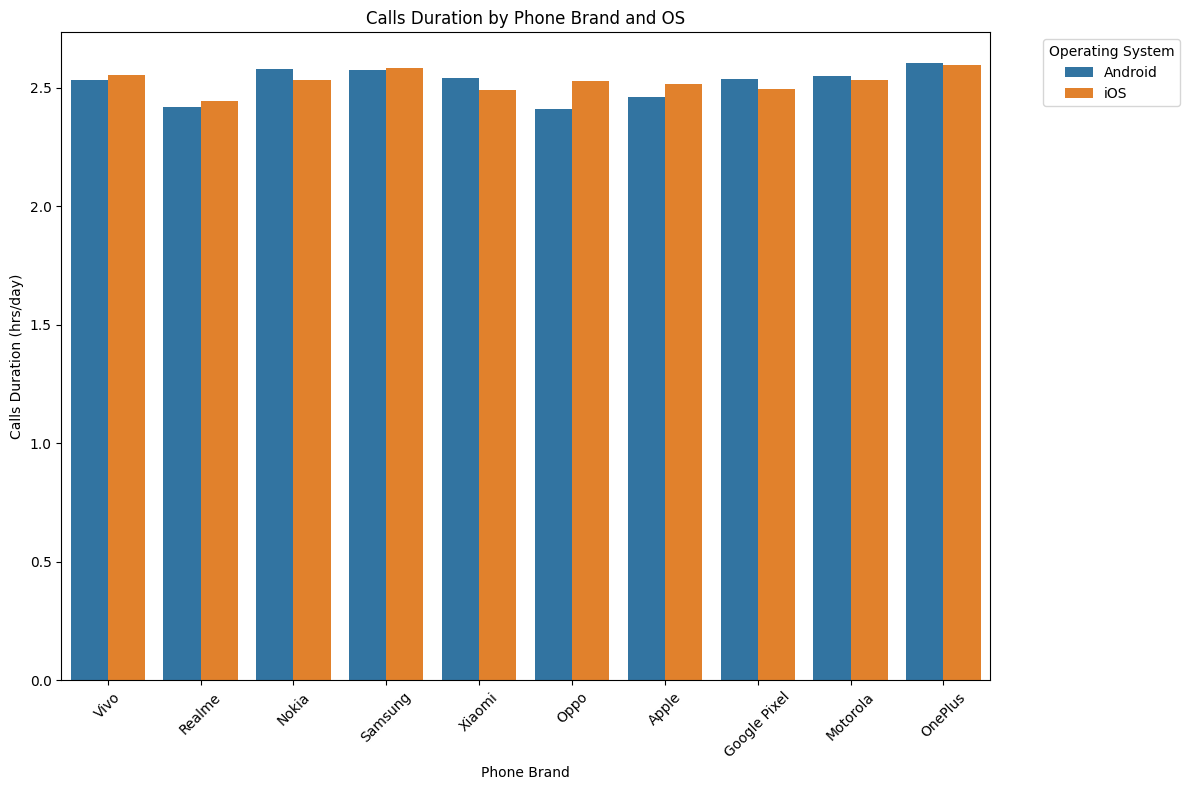

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x="Phone Brand", y="Calls Duration (hrs/day)", hue="OS", ci=None)
plt.title("Calls Duration by Phone Brand and OS")
plt.xlabel("Phone Brand")
plt.ylabel("Calls Duration (hrs/day)")
plt.legend(title="Operating System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### OnePlus has highest calls duration 
### Difference of call duration is most significant in Oppo

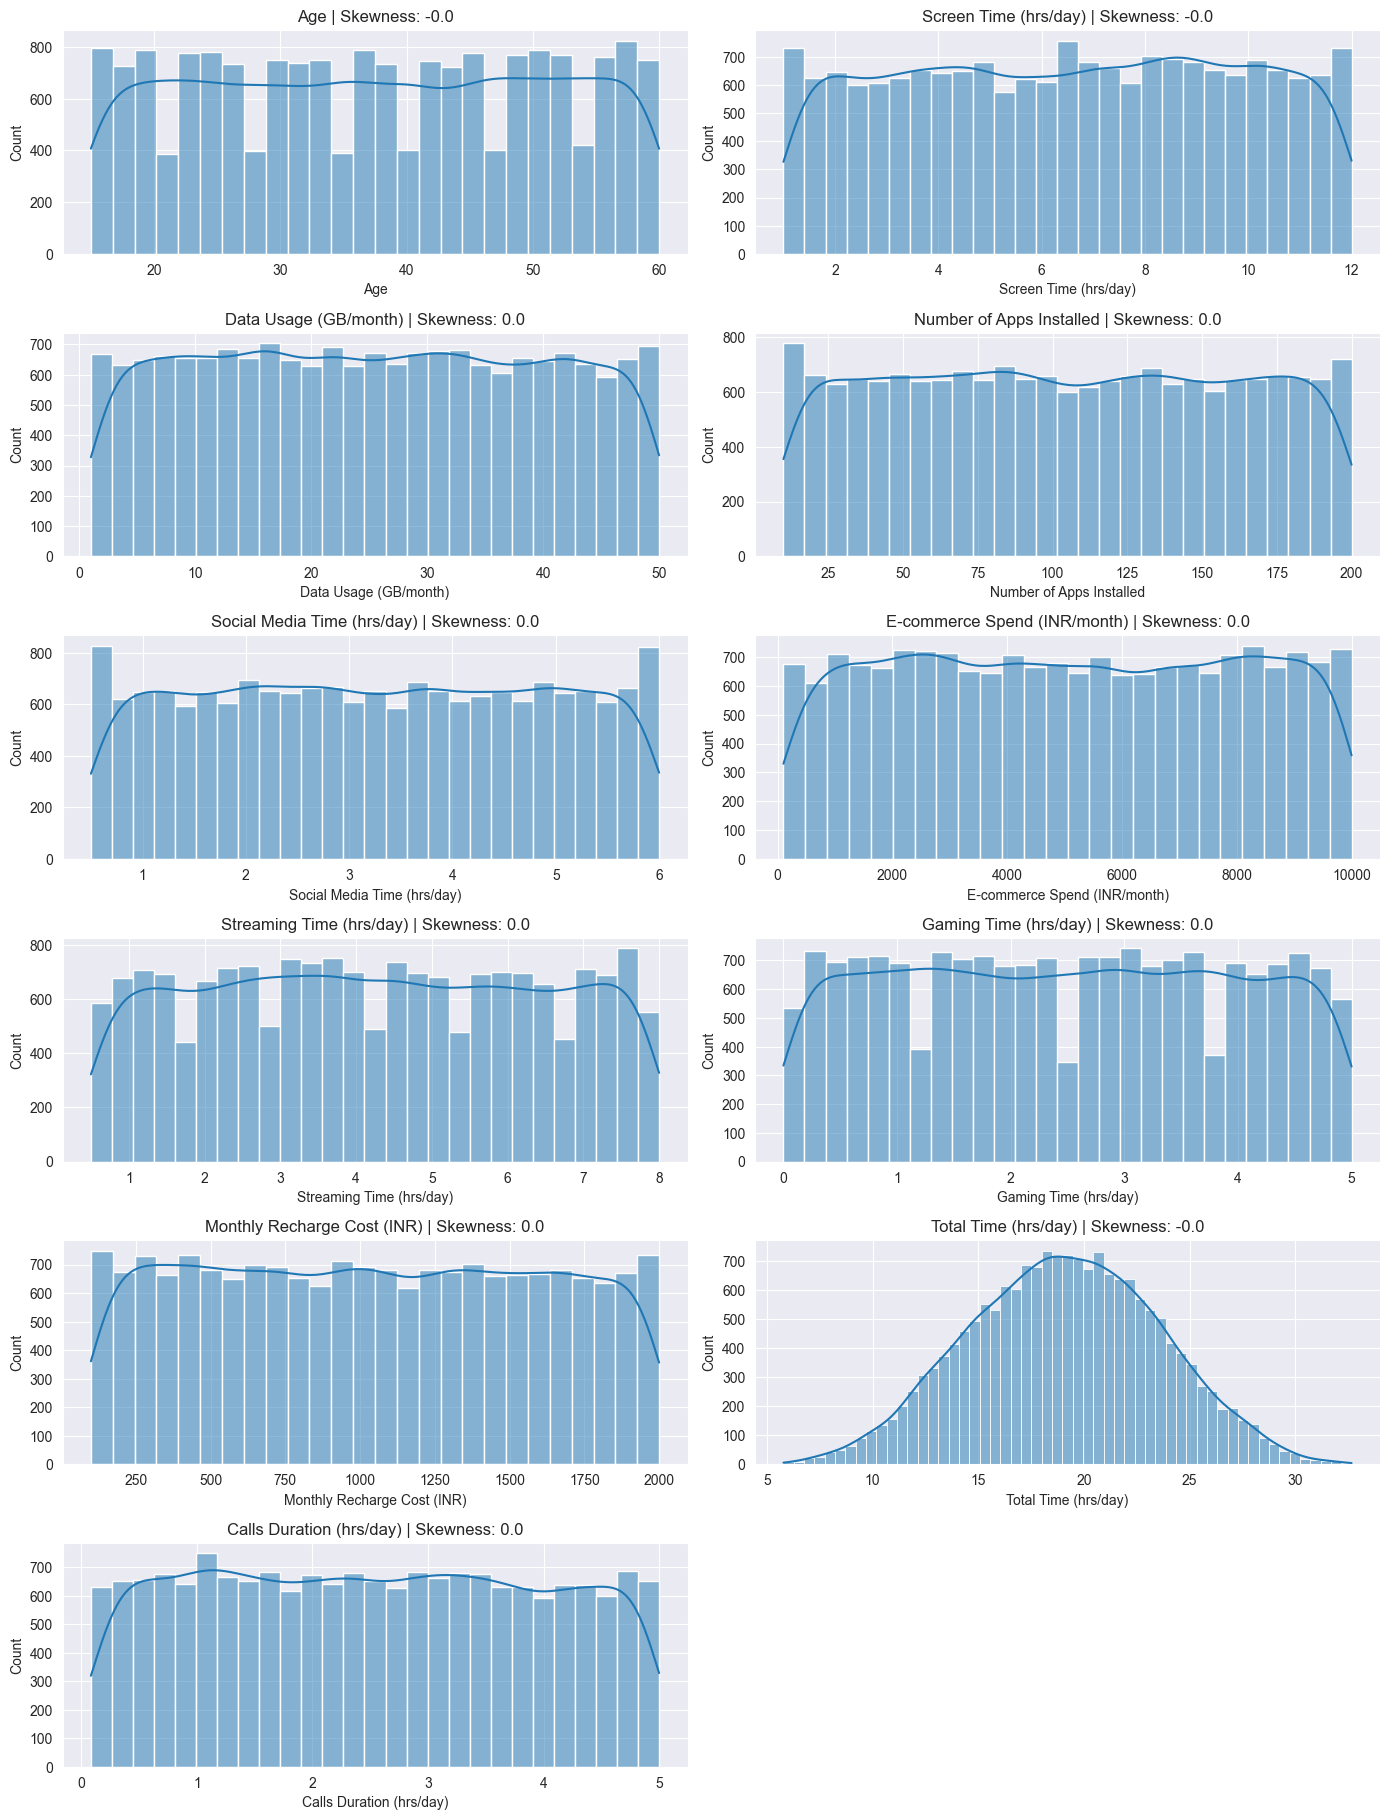

In [12]:
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 1)}")

plt.tight_layout()
plt.show()


## A skewness of 0 indicates that the data distribution is perfectly symmetrical.

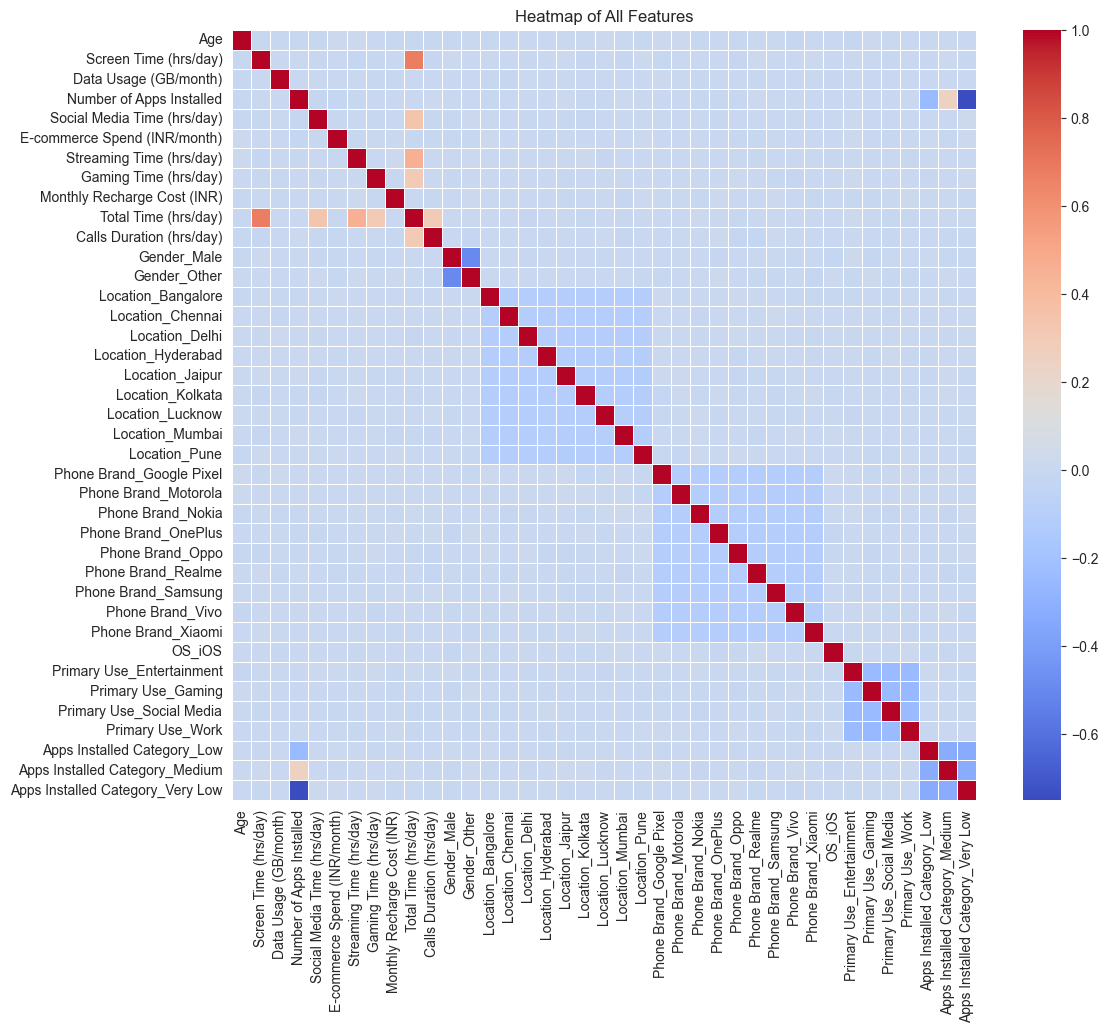

In [13]:
plt.figure(figsize=(12, 10))
encoded_df = pd.get_dummies(df, drop_first=True)
correlation_matrix = encoded_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of All Features")
plt.show()

## Total time is most correlated with Screen time